In [18]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
TSF = quandl.get("FRED/DCOILBRENTEU",start_date="1847-05-01",end_date="2022-10-01")
TSF.describe()

,Value
count,8887.000000
mean,47.654745
std,32.402911
min,9.100000
25%,18.985000
50%,36.850000
75%,68.935000
max,143.950000


<AxesSubplot:xlabel='Date'>

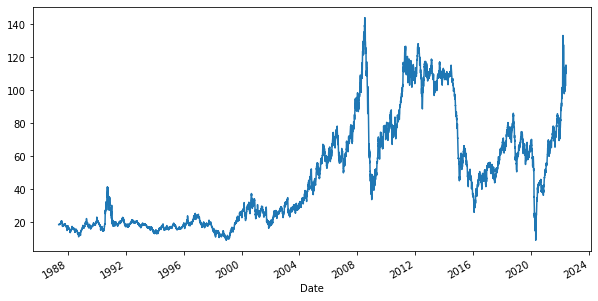

In [20]:
TSF.Value.plot(figsize=(10,5))

In [21]:
# FInding the rolling window average
TSF["MA-4"] = TSF["Value"].shift(1).rolling(window = 4).mean()

TSF["MA-10"] = TSF["Value"].shift(1).rolling(window = 10).mean()

TSF.dropna(axis=0,inplace =True)
TSF.head(10)

,Value,MA-4,MA-10
Date,,,
1987-06-03,18.75,18.6275,18.597
1987-06-04,18.78,18.6650,18.609
1987-06-05,18.65,18.7150,18.642
1987-06-08,18.75,18.7150,18.652
1987-06-09,18.78,18.7325,18.667
1987-06-10,18.78,18.7400,18.682
1987-06-11,18.68,18.7400,18.700
1987-06-12,18.78,18.7475,18.708
1987-06-16,18.90,18.7550,18.728


In [22]:
# Creating a train and test variable
X = TSF[["MA-4","MA-10"]]
Y = TSF["Value"]

In [23]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9975415520835388

In [24]:
# Prediction
y_pred = model.predict(x_test)
y_pred 

array([ 26.18098259,  17.15796238,  19.28125434, ...,  19.15111684,
        20.25307638, 108.63542   ])

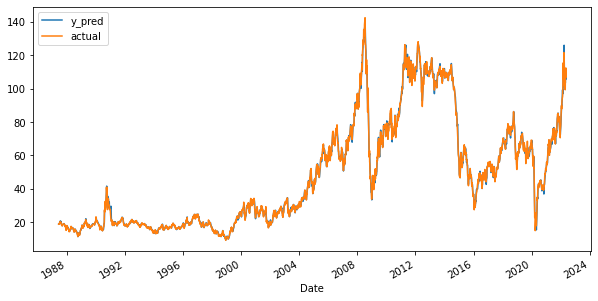

In [25]:
# Creating the new dataframe for prediction and comparing it with the test result
df1 = pd.DataFrame(y_pred,index=y_test.index,columns = ["price"])

df1.plot(figsize=(10,5))
y_test.plot()

plt.legend(["y_pred","actual"])
plt.show()